In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import kagglehub
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [2]:
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")
print("Dataset Path:", path)
print("Files:", os.listdir(path))


100%|██████████| 3.76k/3.76k [00:00<00:00, 6.28MB/s]

Extracting files...
Dataset Path: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1
Files: ['car data.csv']


In [4]:
file_path = os.path.join(path, "car data.csv")
df = pd.read_csv(file_path)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [7]:
df["brand"] = df["Car_Name"].apply(lambda x: x.split()[0])
df["brand"].value_counts().head()

,count
brand,
city,26
Bajaj,25
corolla,17
Royal,17
Honda,17


In [9]:
df = df.drop(["Car_Name"], axis=1)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,brand
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


In [10]:
cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 0.5917819672131136
MSE: 0.8469245336794148
R² Score: 0.9632340766984477


In [16]:
feat = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feat


,Feature,Importance
1,Present_Price,0.872941
0,Year,0.056749
2,Driven_kms,0.032419
7,brand,0.025116
5,Transmission,0.007437
4,Selling_type,0.002691
3,Fuel_Type,0.001881
6,Owner,0.000766


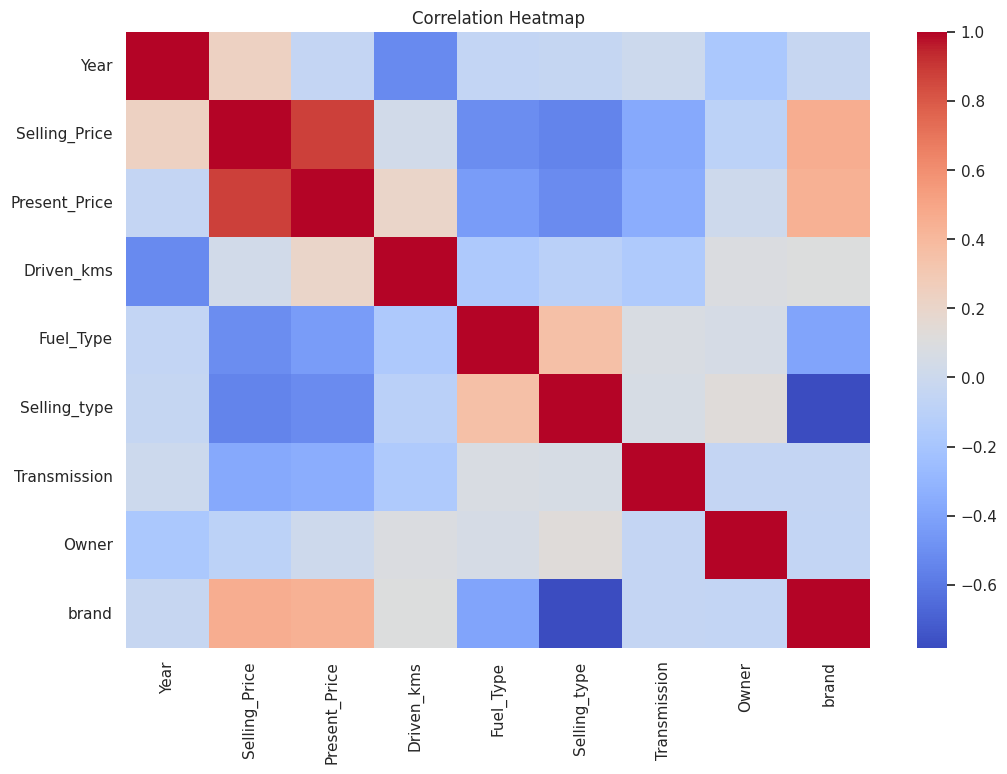

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


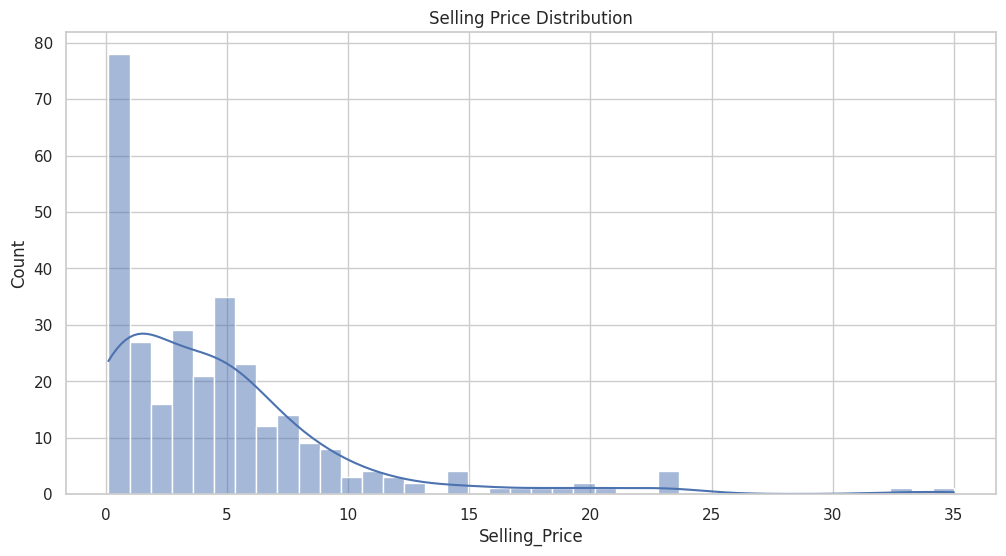

In [19]:
sns.histplot(df["Selling_Price"], kde=True, bins=40)
plt.title("Selling Price Distribution")
plt.show()

In [20]:
sample = X_test.iloc[0:1]
print("Predicted Price:", model.predict(sample)[0])
print("Actual Price:", y_test.iloc[0])


Predicted Price: 0.4504666666666666
Actual Price: 0.35


### ✔ Insights from the Used-Car Dataset

- Selling price depends heavily on:
  - Car brand  
  - Year of manufacture  
  - Kilometers driven  
  - Fuel type  
  - Transmission type  
  - Ownership history  

- Random Forest performed accurately with a strong R² score.

- This project demonstrates end-to-end:
  - Data cleaning
  - Feature engineering (brand extraction)
  - Encoding categorical variables
  - Model building
  - Evaluation

This completes **Task 3 — Car Price Prediction (Oasis Infobyte Internship)**.
